In [63]:
# Importing core libraries for data handling (pandas), visualization (seaborn), and plotting (matplotlib)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [64]:
# Loading the 2021 NFL season dataset, previewing the first few rows, and displaying all column names
nfl = pd.read_csv('season_2021.csv')
print(nfl.head())
nfl.columns

           team_name week  day          date result              opponent  \
0  Arizona Cardinals    1  Sun  September 12      W      Tennessee Titans   
1  Arizona Cardinals    2  Sun  September 19      W     Minnesota Vikings   
2  Arizona Cardinals    3  Sun  September 26      W  Jacksonville Jaguars   
3  Arizona Cardinals    4  Sun     October 3      W      Los Angeles Rams   
4  Arizona Cardinals    5  Sun    October 10      W   San Francisco 49ers   

   tm_score  opp_score  1stD_offense  TotYd_offense  PassY_offense  \
0        38         13            22            416            280   
1        34         33            21            474            371   
2        31         19            23            407            316   
3        37         20            27            465            249   
4        17         10            20            304            210   

   RushY_offense  TO_offense  1stD_defense  TotYd_defense  PassY_defense  \
0            136           1            

Index(['team_name', 'week', 'day', 'date', 'result', 'opponent', 'tm_score',
       'opp_score', '1stD_offense', 'TotYd_offense', 'PassY_offense',
       'RushY_offense', 'TO_offense', '1stD_defense', 'TotYd_defense',
       'PassY_defense', 'RushY_defense', 'TO_defense'],
      dtype='object')

In [65]:
# Displaying the number of wins, losses, and ties in the dataset
print(nfl.result.value_counts())

result
W    284
L    284
T      2
Name: count, dtype: int64


In [67]:
# Converting game results into numeric labels: 1 for wins, 0 for losses and ties

nfl['result'] = (
    nfl['result']
    .replace({'W': 1, 'L': 0, 'T': 0})
    .astype(int)
)

In [68]:
# Fitting the scaler to the game stat features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = nfl.iloc[:, 8:]
scaler.fit(features)

# Transforming (standardizing) the features
X = scaler.transform(features)

In [69]:
# Saving the game outcomes as the target variable
y = nfl['result']

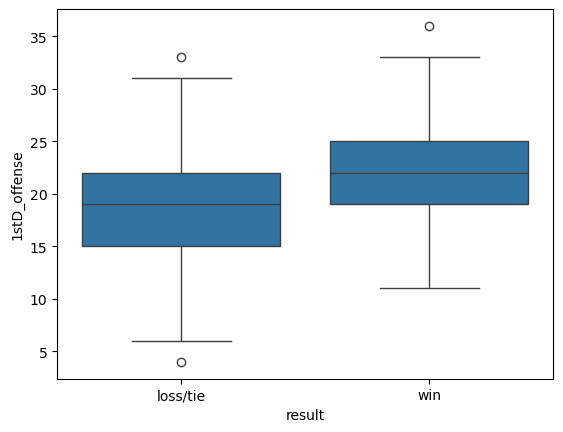

Index(['1stD_offense', 'TotYd_offense', 'PassY_offense', 'RushY_offense',
       'TO_offense', '1stD_defense', 'TotYd_defense', 'PassY_defense',
       'RushY_defense', 'TO_defense'],
      dtype='object')


In [70]:
# change stat to view plot
stat = '1stD_offense'

# box plot of stat
stat_plot = sns.boxplot(
    x='result',
    y=stat,
    data=nfl
)

# Proper tick handling 
stat_plot.set_xticks([0, 1])
stat_plot.set_xticklabels(['loss/tie', 'win'])

plt.show()

# list of feature names
print(nfl.columns[8:])

In [71]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.5, 
    random_state=42
)

In [72]:
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression classifier
lrc = LogisticRegression()

# Training the model on the training data
lrc.fit(X_train, y_train)

LogisticRegression()

In [73]:
# Making predictions on the test set
y_pred = lrc.predict(X_test)

# Checking model accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.8280701754385965


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Defining the hyperparameter values to test

penalties = ['l1', 'l2']
C_values = [0.01, 0.1, 1, 10, 100]

# Looping through every combination of penalty and C value

for p in penalties:
    for c in C_values:
        try:
            model = LogisticRegression(penalty=p, C=c, solver='liblinear')
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            print(f"Penalty: {p}, C: {c}, Accuracy: {acc}")
        except Exception as e:
            print(f"Penalty: {p}, C: {c} — Not supported ({e})")

Penalty: l1, C: 0.01, Accuracy: 0.5228070175438596
Penalty: l1, C: 0.1, Accuracy: 0.8456140350877193
Penalty: l1, C: 1, Accuracy: 0.8315789473684211
Penalty: l1, C: 10, Accuracy: 0.8245614035087719
Penalty: l1, C: 100, Accuracy: 0.8245614035087719
Penalty: l2, C: 0.01, Accuracy: 0.8035087719298246
Penalty: l2, C: 0.1, Accuracy: 0.8350877192982457
Penalty: l2, C: 1, Accuracy: 0.8280701754385965
Penalty: l2, C: 10, Accuracy: 0.8245614035087719
Penalty: l2, C: 100, Accuracy: 0.8245614035087719


Test size: 0.1, Accuracy: 0.8596491228070176
Test size: 0.2, Accuracy: 0.8771929824561403
Test size: 0.3, Accuracy: 0.8713450292397661
Test size: 0.4, Accuracy: 0.8464912280701754
Test size: 0.5, Accuracy: 0.8280701754385965


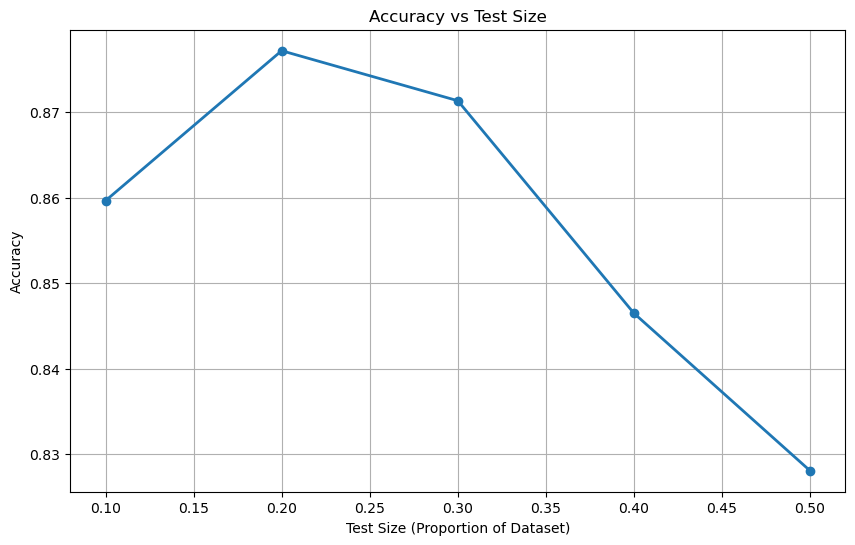

In [75]:
# Evaluating model accuracy across different test set sizes
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracies = []  # store accuracy values for plotting

for ts in test_sizes:
    # Splitting the dataset using the current test size
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=ts, random_state=42
    )
    
    # Training a basic logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predicting and calculating accuracy
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    
    accuracies.append(acc)  # saving accuracy for visualization
    
    print(f"Test size: {ts}, Accuracy: {acc}")



plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies, marker='o', linewidth=2)
plt.title("Accuracy vs Test Size")
plt.xlabel("Test Size (Proportion of Dataset)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Optimized train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Optimized logistic regression model
optLr = LogisticRegression(
    penalty='l2',
    C=1,
    solver='liblinear'
)

# Fitting the optimized model
optLr.fit(X_train, y_train)
# Compute feature importances from logistic regression coefficients
importance = abs(optLr.coef_[0])
# Fit the optimized model
optLr.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

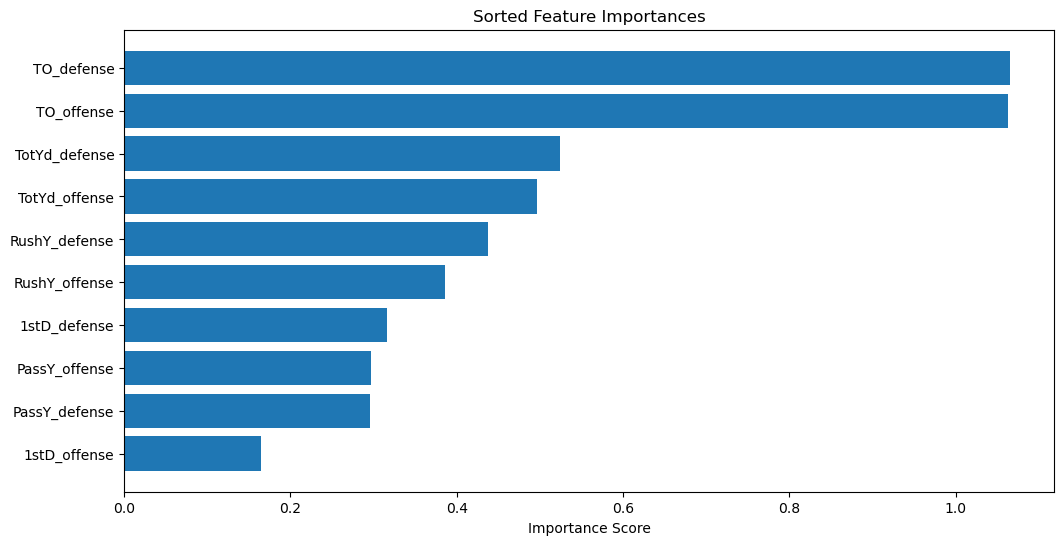

In [77]:
# Sort feature importances from lowest to highest

sorted_idx = importance.argsort()

plt.figure(figsize=(12, 6))
plt.barh(nfl.columns[8:][sorted_idx], importance[sorted_idx])
plt.title("Sorted Feature Importances")
plt.xlabel("Importance Score")
plt.show()

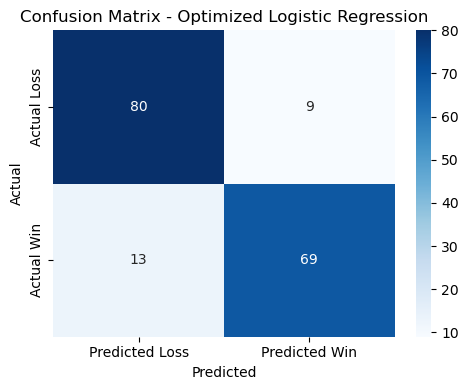

Classification Report:

              precision    recall  f1-score   support

        Loss       0.86      0.90      0.88        89
         Win       0.88      0.84      0.86        82

    accuracy                           0.87       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.87      0.87      0.87       171



In [78]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions from the optimized model
y_pred_opt = optLr.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_opt)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Loss', 'Predicted Win'],
            yticklabels=['Actual Loss', 'Actual Win'])
plt.title("Confusion Matrix - Optimized Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_opt, target_names=['Loss', 'Win']))

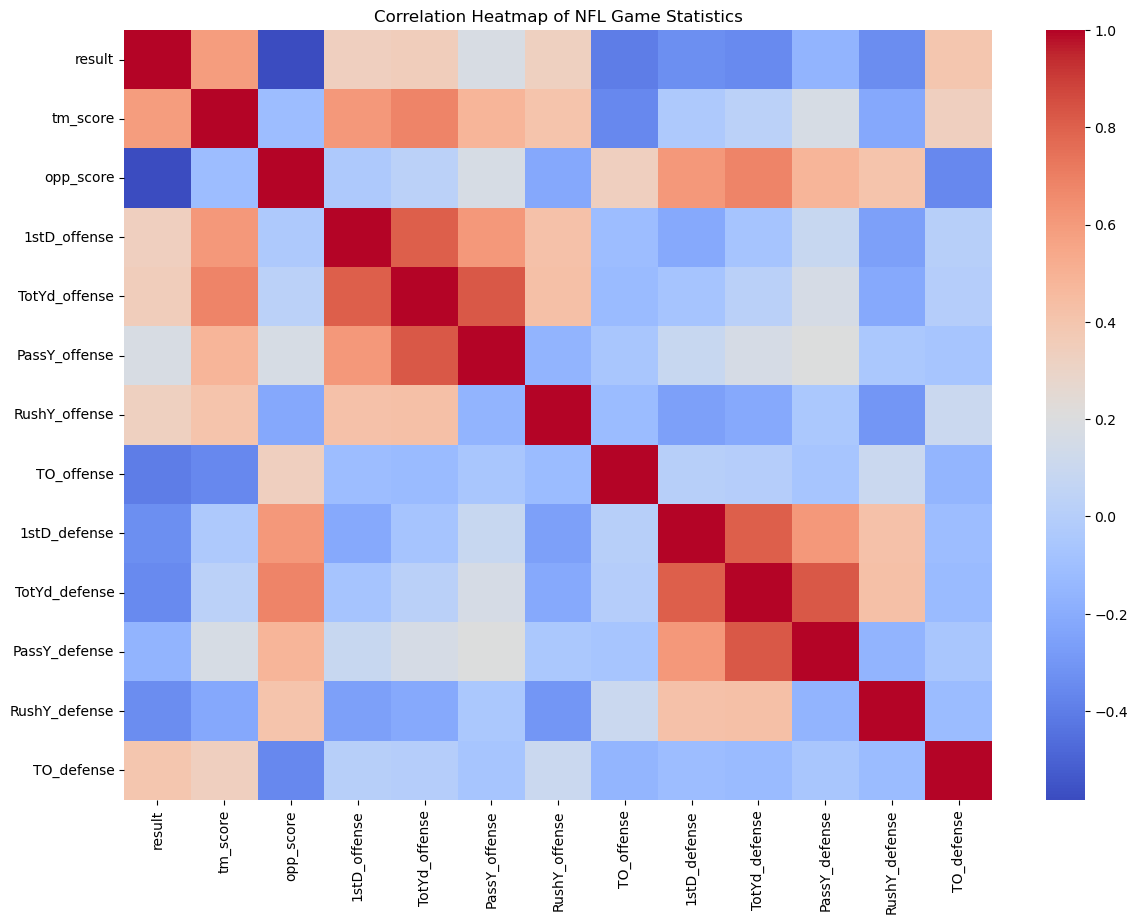

In [79]:
# Select only numeric columns
numeric_nfl = nfl.select_dtypes(include=['number'])

# Generate a correlation heatmap to visualize relationships between numeric features.

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_nfl.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of NFL Game Statistics")
plt.show()

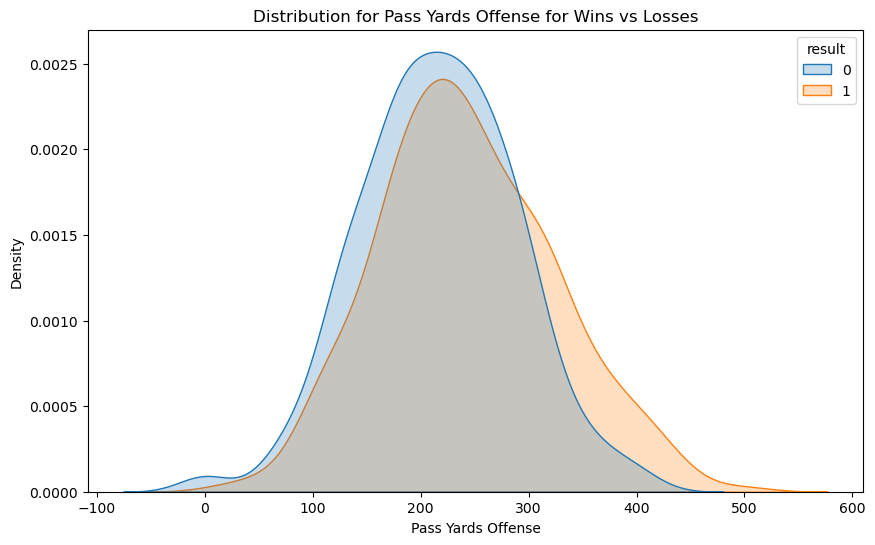

In [81]:
# Selecting the offensive passing yards column to visualize

stat = 'PassY_offense'   

# Creating a KDE (density) plot to compare passing yards in wins vs losses

plt.figure(figsize=(10, 6))
sns.kdeplot(data=nfl, x=stat, hue='result', fill=True)


plt.title("Distribution for Pass Yards Offense for Wins vs Losses")
plt.xlabel("Pass Yards Offense")
plt.ylabel("Density")

plt.show()

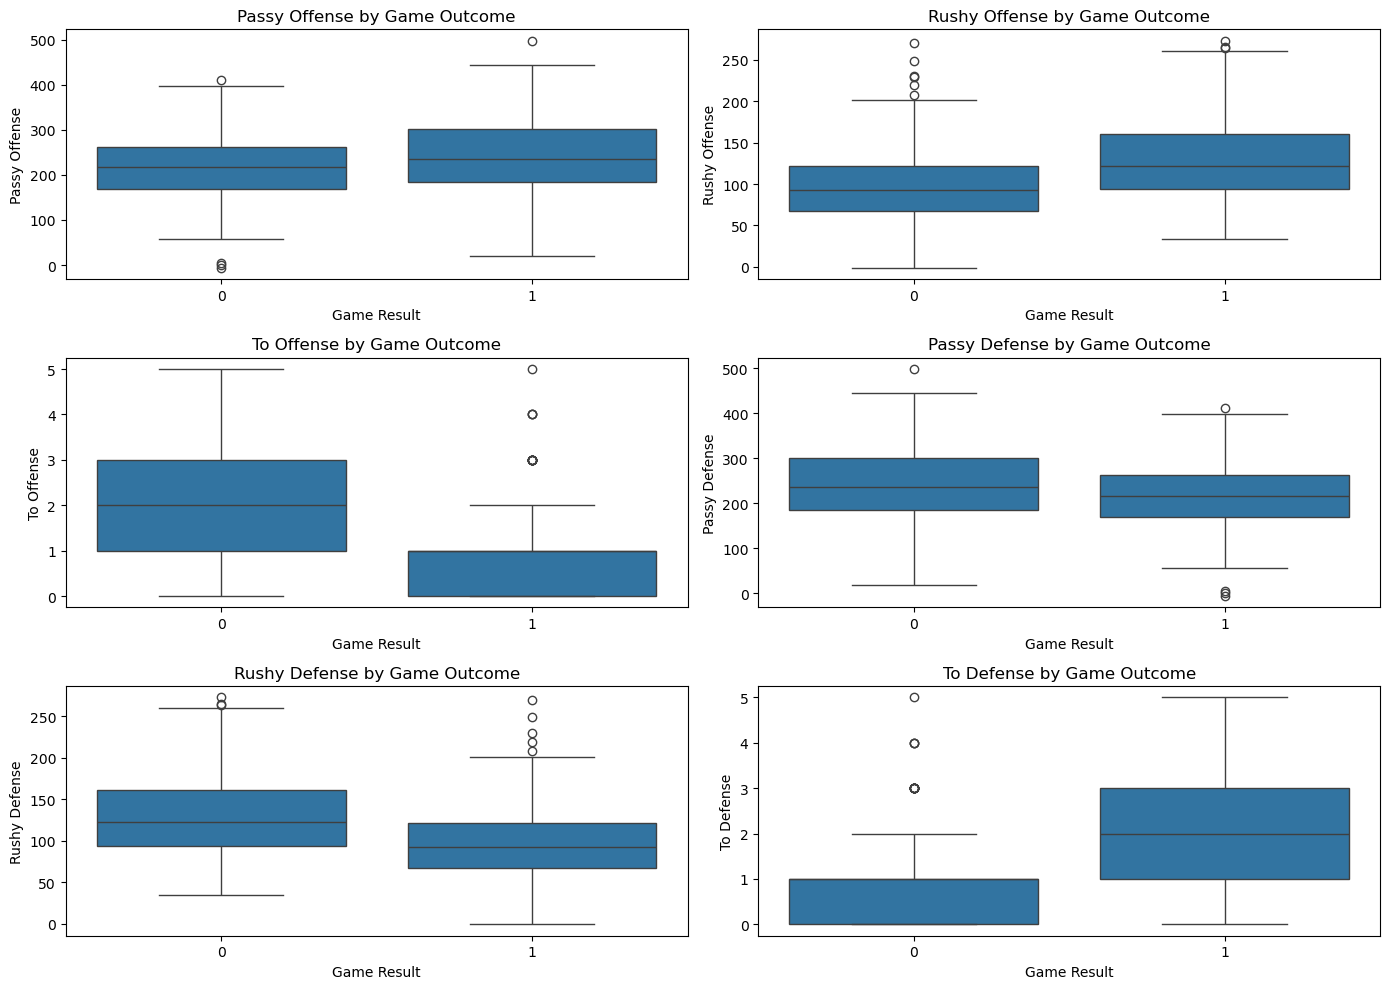

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of offensive and defensive stats to compare across wins and losses
stats_to_plot = ['PassY_offense', 'RushY_offense', 'TO_offense', 
                 'PassY_defense', 'RushY_defense', 'TO_defense']

plt.figure(figsize=(14, 10))

# Loop through each stat and create a boxplot in its own subplot
for i, stat in enumerate(stats_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=nfl, x='result', y=stat)
    plt.title(f"{stat.replace('_', ' ').title()} by Game Outcome")
    plt.xlabel("Game Result")
    plt.ylabel(stat.replace('_', ' ').title())

plt.tight_layout()
plt.show()

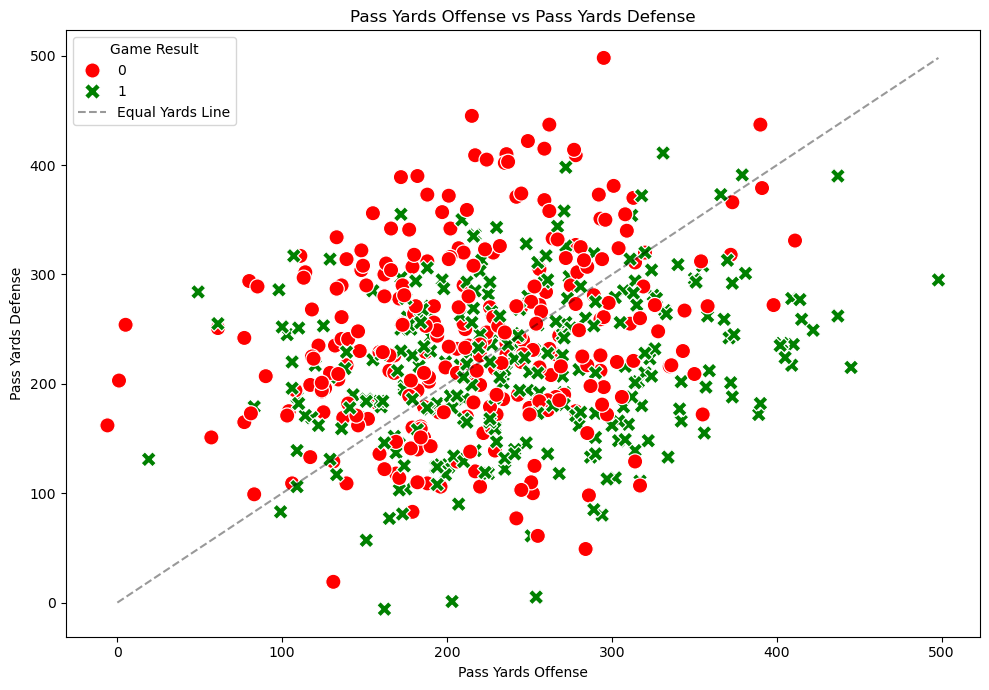

In [83]:


plt.figure(figsize=(10, 7))

# Defining custom colors for each game result, including ties
palette = {
    1: 'green',   # win
    0: 'red'      # loss/tie
}
# Plot a scatterplot comparing offensive vs defensive passing yards.
# Points are colored and shaped based on game result to improve readability.
sns.scatterplot(
    data=nfl,
    x='PassY_offense',
    y='PassY_defense',
    hue='result',
    style='result',
    s=120,
    palette=palette
)

# Add diagonal reference line (offense = defense)
max_val = max(nfl['PassY_offense'].max(), nfl['PassY_defense'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.4, label='Equal Yards Line')

# Titles and labels
plt.title("Pass Yards Offense vs Pass Yards Defense")
plt.xlabel("Pass Yards Offense")
plt.ylabel("Pass Yards Defense")

plt.legend(title="Game Result")
plt.tight_layout()
plt.show()